In [9]:
import pandas as pd
import numpy as np
from scipy.signal import butter,filtfilt
import os

In [10]:
path_to_data = 'D://COUGHVID/coswara'
assert os.path.exists(path_to_data)
csv_file = os.path.join(path_to_data, 'extracted_data.csv')
df = pd.read_csv(csv_file)

In [11]:
# Now let's visualize and listen to some sounds!!
import librosa
import IPython
audio_path = os.path.join(path_to_data, 'audio')
audio_files = os.listdir(audio_path)
audio_file = os.path.join(audio_path, audio_files[0])
x, sr = librosa.load(audio_file)
print(x.shape) # audio array
print(sr) # sampling rate

(180634,)
22050


In [12]:
import IPython.display as ipd
ipd.Audio(audio_file)

In [13]:
print(x.shape)

(180634,)


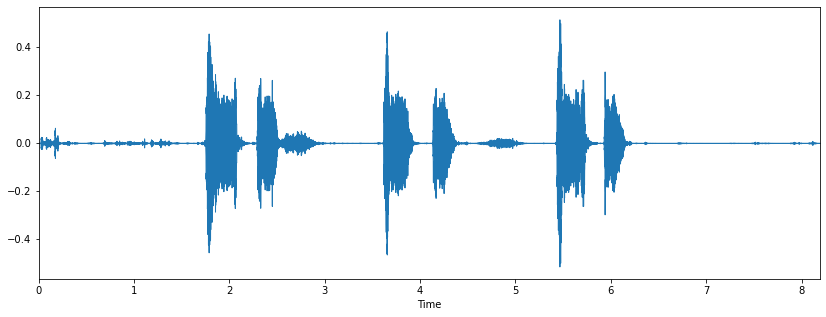

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [15]:
import math
RMS=math.sqrt(np.mean(x**2))
print(RMS)

0.03382768401360664


In [17]:
def apply(signal, RMS):
    #noise = np.random.randn(*features.shape).astype(np.float32)

    dimension = signal.shape[0]
    noise = np.random.normal(0, RMS/2, dimension)

    randomness = np.random.randint(2, size=dimension)
    noise = randomness * noise

    samples = signal + noise
    return samples

In [23]:
sample_with_noise = apply(x, RMS)

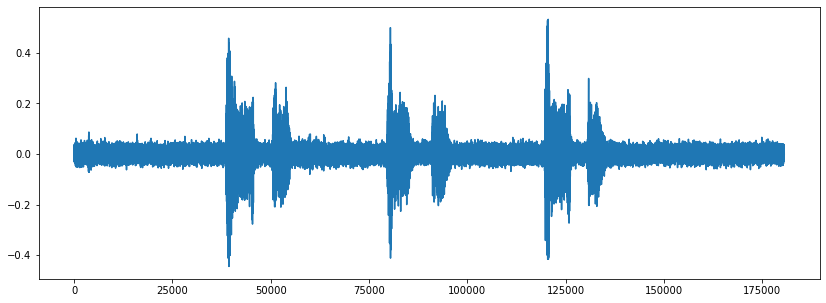

In [24]:
plt.figure(figsize=(14, 5))
plt.plot(sample_with_noise)

In [26]:
ipd.Audio(sample_with_noise, rate=sr)

In [106]:
# lowpass Filter requirements.
lp_fs = 30.0       # sample rate, Hz
lp_cutoff = 3      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
lp_nyq = 0.5 * lp_fs  # Nyquist Frequency
lp_order = 2      # sin wave can be approx represented as quadratic

In [102]:
def apply_lp(data, cutoff, fs, order):
    normal_cutoff = cutoff / lp_nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='lowpass', analog=False)
    y = filtfilt(b, a, data)
    return y

In [103]:
lowpass_sample_with_noise = apply_lp(sample_with_noise, lp_cutoff, lp_fs, lp_order)

In [104]:
ipd.Audio(lowpass_sample_with_noise, rate=sr)

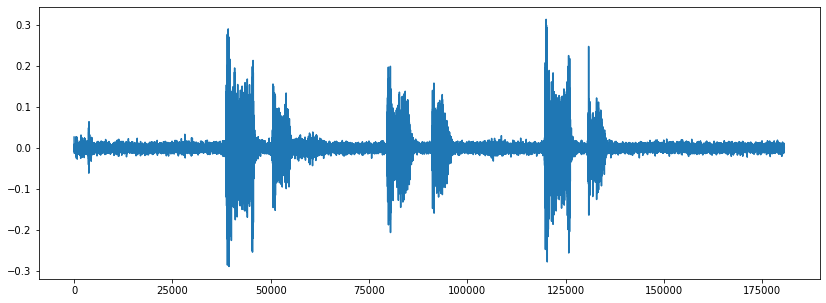

In [105]:
plt.figure(figsize=(14, 5))
plt.plot(lowpass_sample_with_noise)

In [127]:
# highpass Filter requirements.
hp_fs = 30.0       # sample rate, Hz
hp_cutoff = 0.5      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
hp_nyq = 0.5 * hp_fs  # Nyquist Frequency
hp_order = 3      # sin wave can be approx represented as quadratic

In [128]:
def apply_hp(data, cutoff, fs, order):
    normal_cutoff = cutoff / hp_nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='highpass', analog=False)
    y = filtfilt(b, a, data)
    return y

In [129]:
highpass_sample_with_noise = apply_hp(sample_with_noise, hp_cutoff, hp_fs, hp_order)

In [130]:
ipd.Audio(highpass_sample_with_noise, rate=sr)

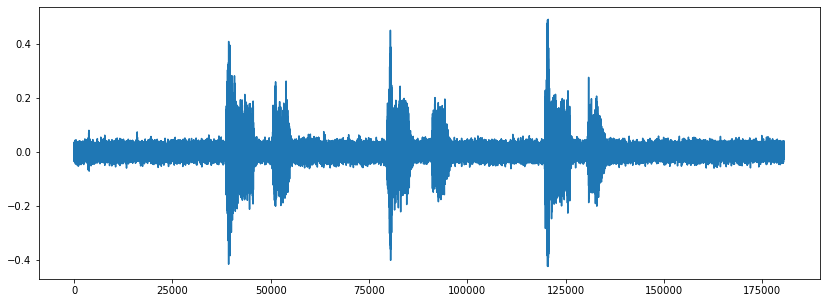

In [131]:
plt.figure(figsize=(14, 5))
plt.plot(highpass_sample_with_noise)